### 一、前期工作

#### 设置GPU

In [25]:
import tensorflow as tf
import os
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [14]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    gpu0 = gpus[0]
    tf.config.experimental.set_memory_growth(gpu0, True)
    tf.config.set_visible_devices([gpu0],"GPU")

#### 导入数据

In [15]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

#### 归一化

In [16]:
train_images, test_images = train_images/255., test_images/255.
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

#### 可视化图片

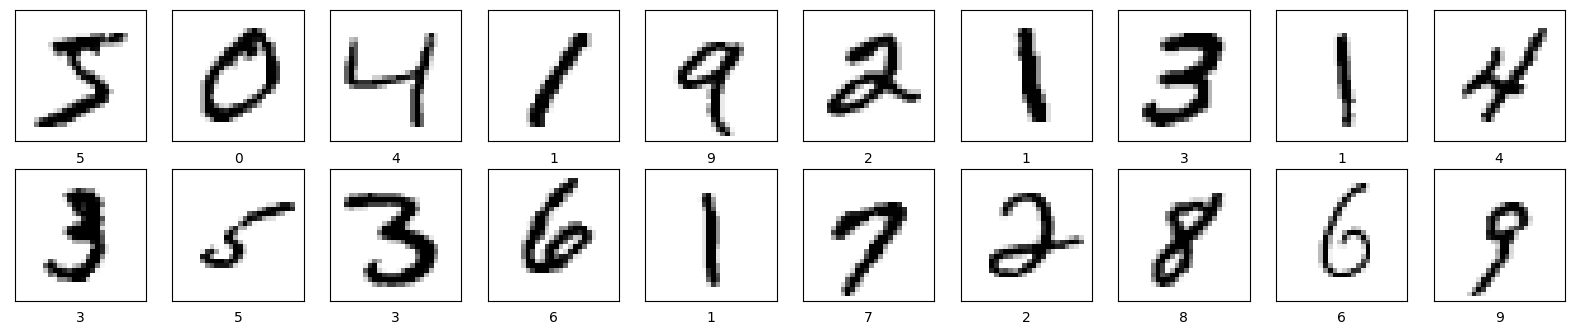

In [17]:
plt.figure(figsize=(20,10))
for i in range(20):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

#### 调整图片格式

In [18]:
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))
train_images, test_images = train_images/255., test_images/255.
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

### 二、构建CNN网络模型

In [19]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),    #卷积层1，卷积核3*3
    layers.MaxPooling2D((2,2)),  #池化层1，2*2采样
    layers.Conv2D(64,(3,3),activation='relu'),  #卷积层2，卷积核3*3
    layers.MaxPool2D((2,2)),     #池化层2，2*2采样

    layers.Flatten(),   #Flatten层，连接卷积层与全连接层
    layers.Dense(64,activation='relu'), #全连接层，特征进一步提取
    layers.Dense(10)    #输出层，输出预期结果
])

# 打印网络结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### 三、编译模型

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### 四、训练模型

In [21]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

2023-01-08 21:10:04.090879: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2023-01-08 21:10:06.040124: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8600
2023-01-08 21:10:07.590806: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-08 21:10:07.679881: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-08 21:10:07.679947: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2023-01-08 21:10:07.769240: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-01-08 21:10:07.769337: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-08 21:10:08.029940: I tensorflow/stream_executor/cuda/c

1875/1875 [==============================] - 13s 4ms/step - loss: 0.6104 - accuracy: 0.8044 - val_loss: 0.2270 - val_accuracy: 0.9326
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1879 - accuracy: 0.9437 - val_loss: 0.1300 - val_accuracy: 0.9609
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1278 - accuracy: 0.9609 - val_loss: 0.0971 - val_accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1010 - accuracy: 0.9689 - val_loss: 0.0968 - val_accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0727 - val_accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0758 - accuracy: 0.9758 - val_loss: 0.0650 - val_accuracy: 0.9788
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0573 - val_accuracy: 0.9812
Ep

### 五、预测

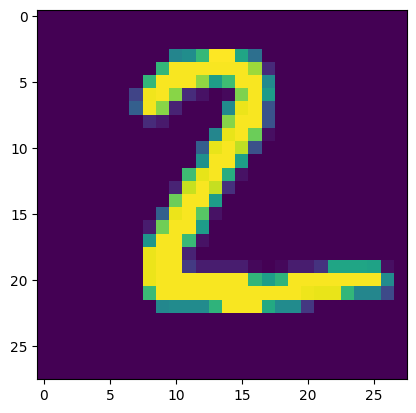

In [22]:
plt.imshow(test_images[1])

In [26]:
pre = model.predict(test_images)
print(np.argmax(pre[1]))

2


输入层：用于将数据输入到训练网络
卷积层：使用卷积核提取图片特征
池化层：进行下采样，用更高层的抽象表示图像特征
Flatten层：将多维的输入一维化，常用在卷积层到全连接层的过渡
全连接层：起到“特征提取器”的作用
输出层：输出结果